# Population estimate of where uniform orbits end up

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
# setup
eb = 0.3

n = 500
x = np.linspace(-np.pi, np.pi, n)
y = np.linspace(-np.pi, np.pi, n)
xx, yy = np.meshgrid(x,y)
i = np.sqrt(xx**2 + yy**2)
om = np.arctan2(yy, xx)

# don't show lines beyond 90deg inclination
i[i>np.pi] = 0

def h(e,i,o):
    return np.cos(i)**2 - e**2 * np.sin(i)**2 * (5*np.sin(o)**2 - 1)

<IPython.core.display.Javascript object>


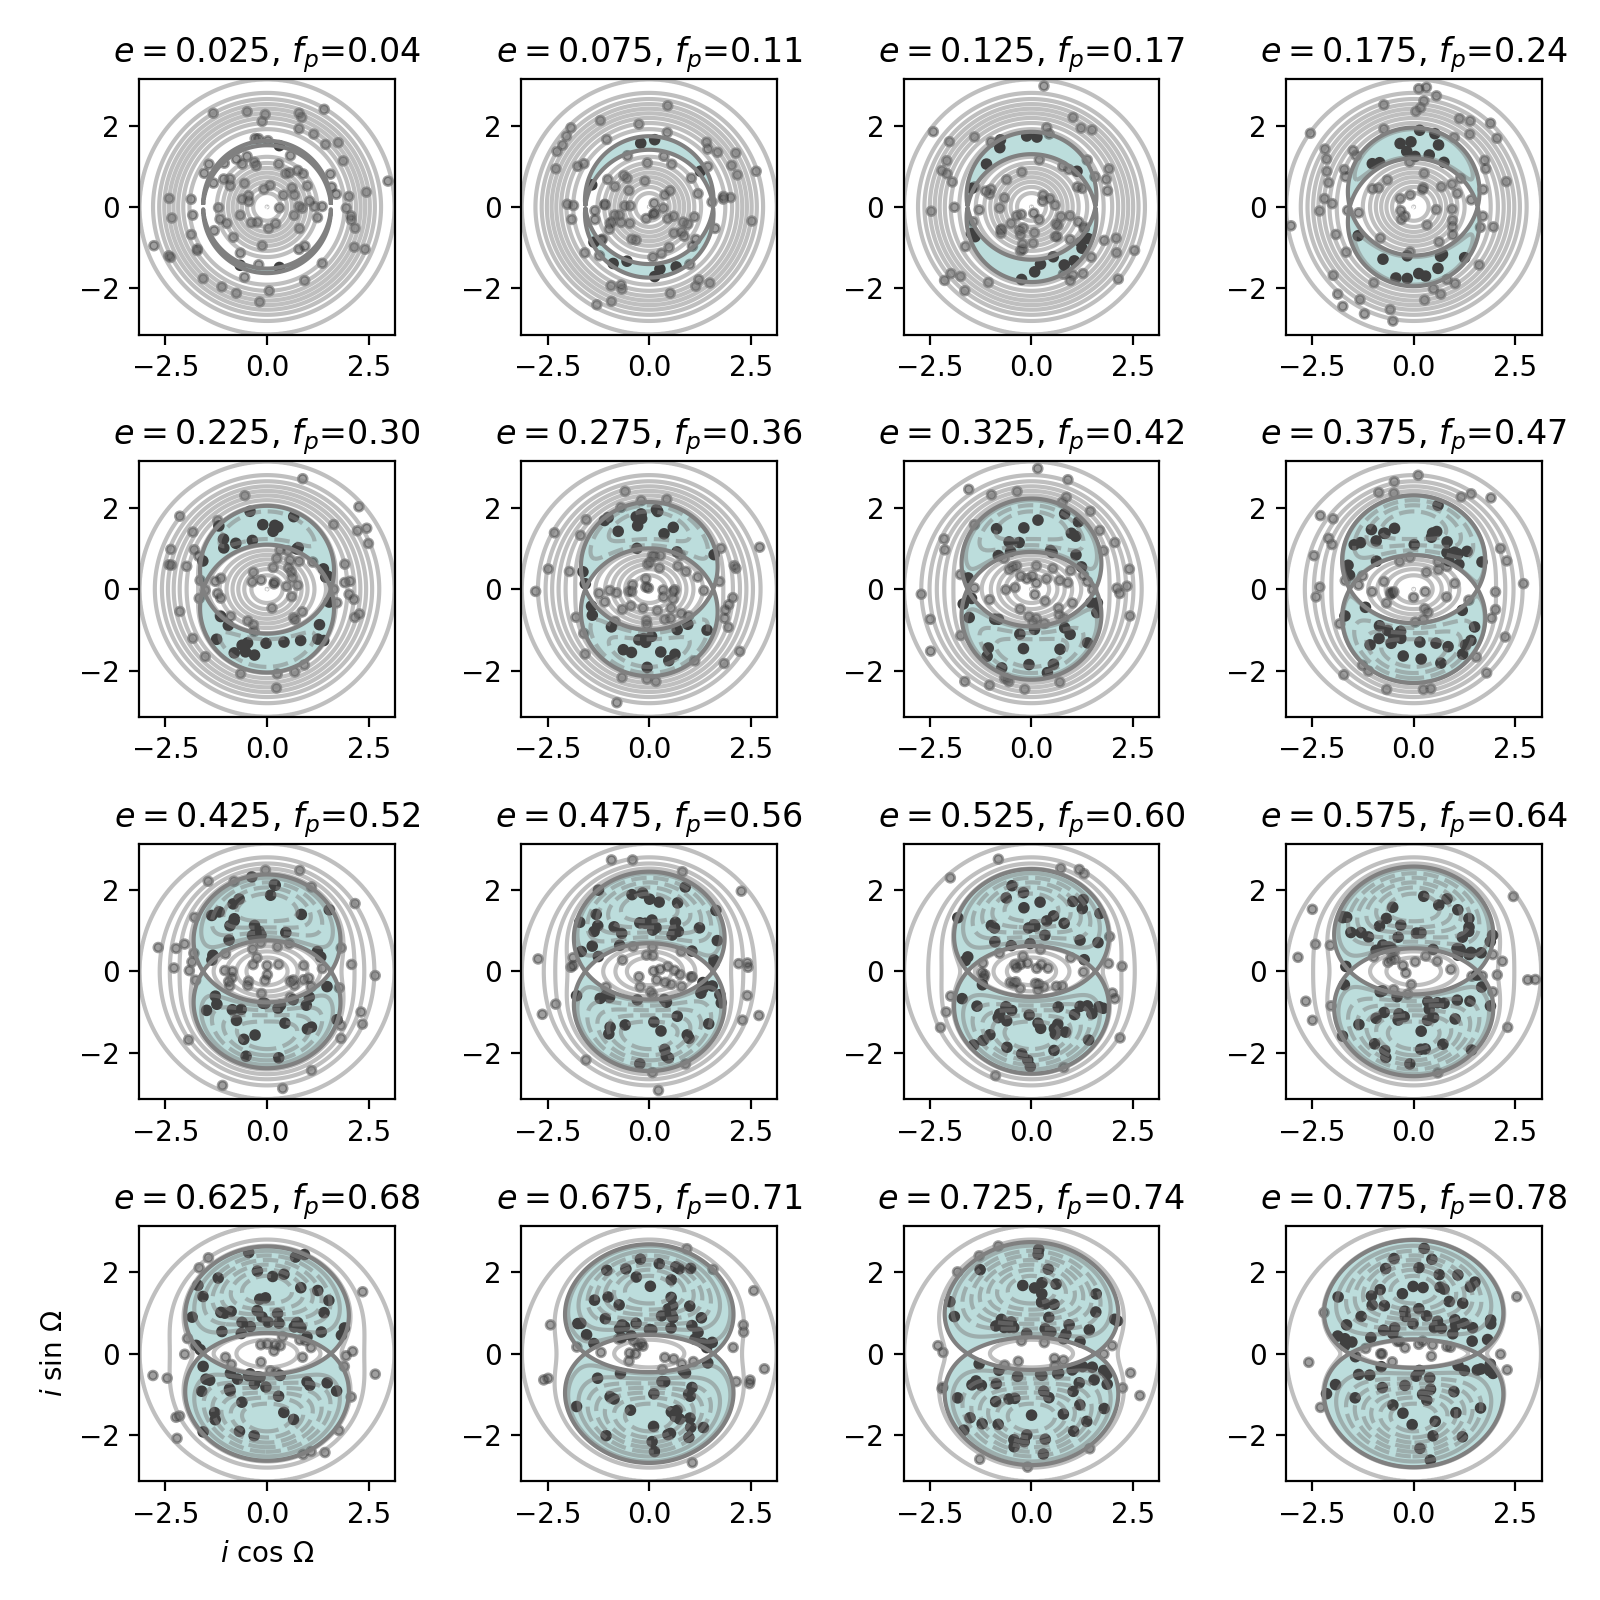

In [3]:
fig, ax = plt.subplots(4,4, figsize=(8,8))

n = 1000000
s = slice(0,100)
f_polar = []
e_edge = np.linspace(0.0,0.8, ax.shape[0]*ax.shape[1]+1, endpoint=True)
e = (e_edge[:-1]+e_edge[1:])/2
j = 0
for ax1 in ax:
    for ax2 in ax1:

        ax2.contour(xx, yy, h(e[j],i,om), np.linspace(-4*e[j]**2,0.9999,10, endpoint=True), colors='grey', alpha=0.5)
        ax2.contour(xx, yy, h(e[j],i,om), e[j]**2, colors='grey')
        ax2.contourf(xx, yy, h(e[j],i,om), [-4*e[j]**2,e[j]**2], alpha=0.3)

        i_tmp = np.arccos(np.random.random(size=n)*2-1)
        om_tmp = np.random.random(size=n)*2*np.pi
        h_tmp = h(e[j], i_tmp, om_tmp)
        pol = h_tmp < (e[j]**2)
        c = np.ones((n,4))*0.25
        c[np.invert(pol),3] = 0.5
        c[pol,3] = 1
        ax2.scatter(i_tmp[s]*np.cos(om_tmp[s]), i_tmp[s]*np.sin(om_tmp[s]), s=10, c=c[s,:])
        f_polar.append( np.sum(pol)/float(n) )
        
        if j==12:
            ax2.set_xlabel('$i$ cos $\Omega$')
            ax2.set_ylabel('$i$ sin $\Omega$')
        
        ax2.set_aspect('equal')
        ax2.set_title('$e=${:4.3f}, $f_p$={:4.2f}'.format(e[j], f_polar[-1]))
        j += 1
        
fig.tight_layout()
fig.savefig('../../../doc/hd98800/figs/polar_frac.pdf')

In [4]:
# mean gives fraction of polar systems, assuming random initial disk orientations
np.mean(f_polar)

0.45807787499999997

In [5]:
np.linspace(-4*e[-1]**2,0.9999,10, endpoint=True)

array([-2.4025    , -2.02445556, -1.64641111, -1.26836667, -0.89032222,
       -0.51227778, -0.13423333,  0.24381111,  0.62185556,  0.9999    ])

In [6]:
# how dominated by high eccentricities are we?
np.cumsum(f_polar)/np.sum(f_polar)

array([0.00487403, 0.01928821, 0.04309707, 0.07597589, 0.11743705,
       0.16687351, 0.22379423, 0.28766875, 0.35803151, 0.43435996,
       0.51617752, 0.60331513, 0.69547945, 0.79241575, 0.89392033,
       1.        ])